In [122]:
import pandas as pd
data=pd.read_csv('heart.csv')

data.shape

(303, 14)

In [123]:
num_true=len(data.loc[data['num']==1])
num_false=len(data.loc[data['num']==0])
print(num_true)
print(num_false)

139
164


In [21]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1.0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,-100000.0,3.0,0.0


In [22]:
data_with_missing=[col for col in data.columns if data[col].isnull().any()]
print(data_with_missing)

[]


In [23]:
s=(data.dtypes=='object')
categorical=list(s[s].index)
print(categorical)

[]


               age       sex        cp  ...        ca      thal       num
age       1.000000 -0.097542  0.104139  ...  0.085766  0.017545  0.223120
sex      -0.097542  1.000000  0.010084  ... -0.079361  0.031518  0.276816
cp        0.104139  0.010084  1.000000  ...  0.019134 -0.028985  0.414446
trestbps  0.284946 -0.064456 -0.036077  ... -0.010263  0.017149  0.150825
chol      0.208950 -0.199915  0.072319  ...  0.068128  0.057866  0.085164
fbs       0.118530  0.047862 -0.039975  ... -0.032997 -0.080552  0.025264
restecg   0.148868  0.021647  0.067505  ...  0.057077 -0.000807  0.169202
thalach  -0.393806 -0.048663 -0.334422  ... -0.038729  0.050287 -0.417167
exang     0.091661  0.146201  0.384060  ...  0.018935 -0.030035  0.431894
oldpeak   0.203805  0.102173  0.202277  ...  0.091285  0.038027  0.424510
slope     0.161770  0.037533  0.152050  ...  0.018934  0.013406  0.339213
ca        0.085766 -0.079361  0.019134  ...  1.000000 -0.009427  0.048491
thal      0.017545  0.031518 -0.028985

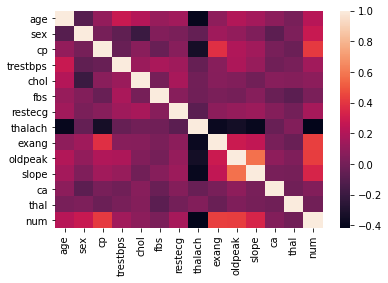

In [39]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = data.corr()
print (corrMatrix)
sn.heatmap(corrMatrix, annot=False)
plt.show()

In [124]:
del(data['oldpeak'])

               age       sex        cp  ...        ca      thal       num
age       1.000000 -0.097542  0.104139  ...  0.085766  0.017545  0.223120
sex      -0.097542  1.000000  0.010084  ... -0.079361  0.031518  0.276816
cp        0.104139  0.010084  1.000000  ...  0.019134 -0.028985  0.414446
trestbps  0.284946 -0.064456 -0.036077  ... -0.010263  0.017149  0.150825
chol      0.208950 -0.199915  0.072319  ...  0.068128  0.057866  0.085164
fbs       0.118530  0.047862 -0.039975  ... -0.032997 -0.080552  0.025264
restecg   0.148868  0.021647  0.067505  ...  0.057077 -0.000807  0.169202
thalach  -0.393806 -0.048663 -0.334422  ... -0.038729  0.050287 -0.417167
exang     0.091661  0.146201  0.384060  ...  0.018935 -0.030035  0.431894
slope     0.161770  0.037533  0.152050  ...  0.018934  0.013406  0.339213
ca        0.085766 -0.079361  0.019134  ...  1.000000 -0.009427  0.048491
thal      0.017545  0.031518 -0.028985  ... -0.009427  1.000000 -0.006624
num       0.223120  0.276816  0.414446

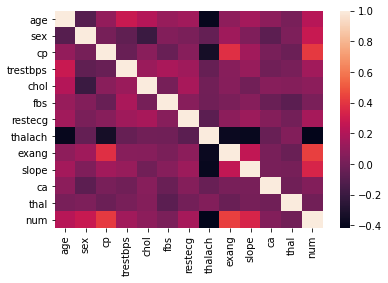

In [125]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = data.corr()
print (corrMatrix)
sn.heatmap(corrMatrix, annot=False)
plt.show()

In [126]:
y=data['num']
del data['num']
y.shape

(303,)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(data, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [182]:
from tensorflow import keras 
from keras import layers
model=keras.Sequential([
                        layers.Dense(units=10,activation='relu',input_shape=[12]),
                        layers.Dense(20,activation='relu'),
                       
                         layers.Dense(1,activation='sigmoid')
])

In [183]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['binary_accuracy'])

In [184]:
early_stopping=keras.callbacks.EarlyStopping(patience=3,min_delta=0.001,restore_best_weights=True)

In [146]:

y_train.shape

(242,)

In [185]:
history=model.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size=10,epochs=15,callbacks=[early_stopping])

Epoch 1/15
25/25 [==============================] - 1s 9ms/step - loss: 286.5584 - binary_accuracy: 0.4480 - val_loss: 394.0471 - val_binary_accuracy: 0.4262
Epoch 2/15
25/25 [==============================] - 0s 3ms/step - loss: 217.4841 - binary_accuracy: 0.4592 - val_loss: 302.1125 - val_binary_accuracy: 0.4262
Epoch 3/15
25/25 [==============================] - 0s 3ms/step - loss: 228.2351 - binary_accuracy: 0.4987 - val_loss: 152.4789 - val_binary_accuracy: 0.5410
Epoch 4/15
25/25 [==============================] - 0s 3ms/step - loss: 121.9155 - binary_accuracy: 0.5006 - val_loss: 4.8364 - val_binary_accuracy: 0.5082
Epoch 5/15
25/25 [==============================] - 0s 3ms/step - loss: 260.8344 - binary_accuracy: 0.5301 - val_loss: 3.3588 - val_binary_accuracy: 0.4918
Epoch 6/15
25/25 [==============================] - 0s 3ms/step - loss: 23.0289 - binary_accuracy: 0.5902 - val_loss: 2.6072 - val_binary_accuracy: 0.5410
Epoch 7/15
25/25 [==============================] - 0s 3ms/

maximum accuracy: 0.6066


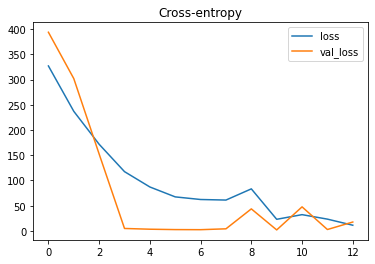

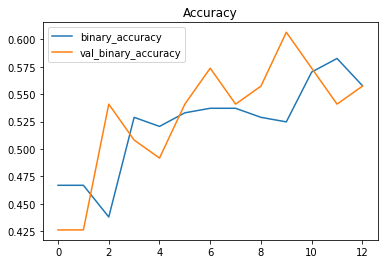

In [186]:
history_df=pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot(title="Cross-entropy")
history_df.loc[:,['binary_accuracy','val_binary_accuracy']].plot(title="Accuracy")
print("maximum accuracy: {:0.4f}".format(history_df['val_binary_accuracy'].max()));

In [139]:
def My_model():
    model=keras.Sequential([
                        layers.Dense(units=128,activation='relu',input_shape=[12]),
                        layers.Dense(100,activation='relu'),
                       
                         layers.Dense(1,activation='sigmoid')])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [140]:
from keras.wrappers.scikit_learn import KerasClassifier
estimator=KerasClassifier(build_fn=My_model,epochs=200,batch_size=5,verbose=0)

In [141]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10,shuffle=True)
results=cross_val_score(estimator,data,y,cv=kfold)

In [142]:
print(
results.mean())

0.8049462318420411
